In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline


## Import IOS Productivity data and create dataframe

In [2]:
df=pd.read_csv(r'/ocean/ksuchy/MOAD/observe/2023_SoG_ZoopProd_Summary.csv')

In [3]:
df

,Cruise,Date,Station,Depth (m),Lat,Lon,BPR (mg C m-2),BPR (mg C m-3),daily P:B
0,2023-003,3/15/2023,42,0,49.028717,-123.103333,796.334303,3.250344,0.146517
1,2023-003,3/16/2023,GEO1,0,49.250683,-123.748883,434.218709,1.258605,0.097271
2,2023-003,3/17/2023,12,0,49.726133,-124.680567,581.042441,1.684181,0.097894
3,2023-020,4/14/2023,42,0,49.028717,-123.103333,636.725746,2.598881,0.136689
4,2023-020,4/11/2023,GEO1,0,49.250683,-123.748883,526.232682,1.525312,0.117609
5,2023-020,4/12/2023,12,0,49.726133,-124.680567,173.536599,0.588260,0.042736
6,2023-021,5/6/2023,42,0,49.028717,-123.103333,241.541408,0.985883,0.060640
7,2023-021,5/5/2023,GEO1,0,49.250683,-123.748883,256.361403,0.743077,0.060972
8,2023-022,6/3/2023,42,0,49.028717,-123.103333,475.261060,1.939841,0.169220
9,2023-022,6/1/2023,GEO1,0,49.250683,-123.748883,1446.029977,4.191391,0.148669


In [30]:
df['Station'].unique()

array(['42', 'GEO1', '12'], dtype=object)

In [5]:
df.keys()

Index(['Cruise', 'Date', 'Station', 'Depth (m)', 'Lat', 'Lon',
       'BPR (mg C m-2)', 'BPR (mg C m-3)', 'daily P:B'],
      dtype='object')

In [6]:
df['Station'].unique()

array(['42', 'GEO1', '12'], dtype=object)

In [7]:
df['Date']

0      3/15/2023
1      3/16/2023
2      3/17/2023
3      4/14/2023
4      4/11/2023
5      4/12/2023
6       5/6/2023
7       5/5/2023
8       6/3/2023
9       6/1/2023
10      6/2/2023
11     7/25/2023
12     7/22/2023
13     7/23/2023
14     6/28/2023
15     6/29/2023
16     6/28/2023
17      9/3/2023
18      9/3/2023
19      9/2/2023
20    10/11/2023
21    10/11/2023
22    10/12/2023
23     5/14/2023
24     5/14/2023
25     5/13/2023
Name: Date, dtype: object

## Figure showing observation locations of IOS sampling

In [8]:
import netCDF4 as nc

In [9]:
cm1=cmocean.cm.thermal
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

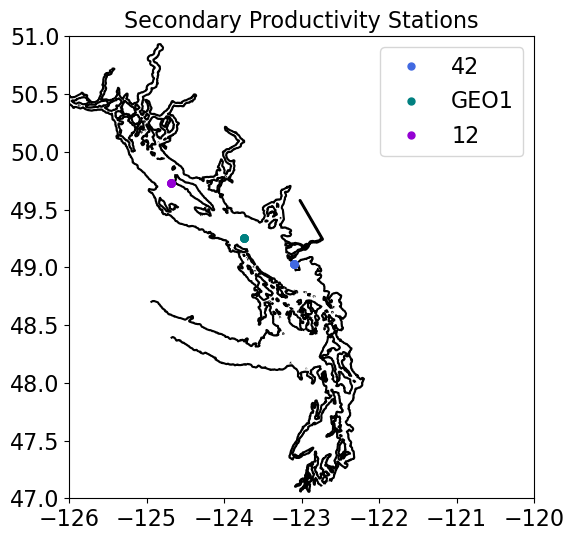

In [72]:


fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('royalblue','teal','darkviolet','fuchsia','firebrick',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue','lightblue','green','darkorange')
datreg=dict()
for ind, iregion in enumerate(df.Station.unique()):
    datreg[iregion] = df.loc[df.Station==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion,markersize=10)
ax.set_ylim(47,51)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -120);
ax.set_title('Secondary Productivity Stations');
ax.legend(bbox_to_anchor=(1, 1))


In [11]:
df['Date']=df['Date'].astype('string')

In [12]:
df['Date']=pd.to_datetime(df.Date, format='%m/%d/%Y')

In [13]:
df['Month'] = df['Date'].dt.month

In [15]:
df['BPR (g C m-2)']=df['BPR (mg C m-2)']/1000

In [16]:
df['Depth (m)']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
Name: Depth (m), dtype: int64

In [17]:
#df = df.rename(columns={'Depth (m)': 'Depth'})


In [18]:
monthlymean=df.groupby(['Month']).mean()

In [19]:
monthlymean.keys()

Index(['Depth (m)', 'Lat', 'Lon', 'BPR (mg C m-2)', 'BPR (mg C m-3)',
       'daily P:B', 'BPR (g C m-2)'],
      dtype='object')

In [20]:
monthlysem=df.groupby(['Month']).sem()

In [43]:
GEO1=df.loc[(df.Station=='GEO1')]

STN12=df.loc[(df.Station=='12')]

STN42=df.loc[(df.Station=='42')]


In [44]:
monthlymeanGEO1=GEO1.groupby(['Month']).mean()

monthlymeanSTN12=STN12.groupby(['Month']).mean()

monthlymeanSTN42=STN42.groupby(['Month']).mean()


In [45]:
monthlymeanGEO1['BPR (g C m-2)'].mean()

0.6258818601357143

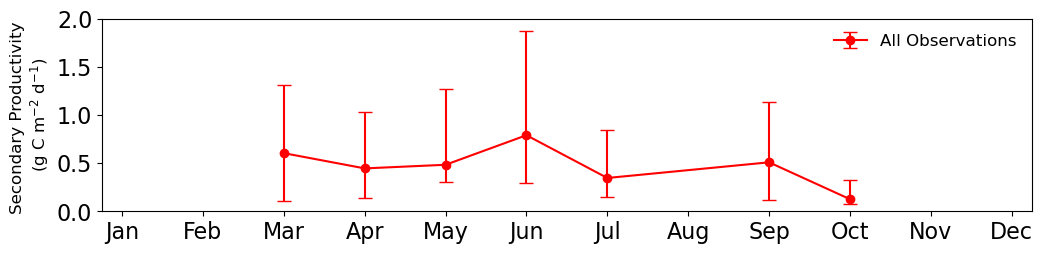

In [46]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named


ax.errorbar(monthlymean.index,((monthlymean['BPR (g C m-2)'])),
               yerr=(np.array([(monthlymean['BPR (g C m-2)']-monthlysem['BPR (g C m-2)']),
                 (monthlymean['BPR (g C m-2)']+monthlysem['BPR (g C m-2)'])])),
              fmt='r-o',capsize=5,color='red',label='All Observations')


ax.set_ylim(0,2)
ax.set_xlim(0.75,12.25)
ax.set_title('')
ax.set_ylabel('Secondary Productivity \n(g C m$^{-2}$ d$^{-1}$)',fontsize=12)
ax.legend(fontsize=12,frameon=False,bbox_to_anchor=(1., 1.0))
#fig.savefig('.png',bbox_inches='tight')

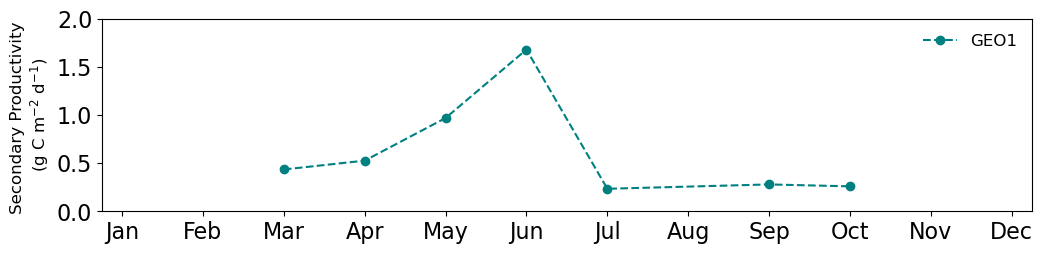

In [47]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))

#'teal','firebrick','darkviolet','fuchsia',
#        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue','lightblue','green','darkorange'

ax.plot(monthlymeanGEO1.index,((monthlymeanGEO1['BPR (g C m-2)'])),\
            color='teal',linestyle='--',marker='o',label='GEO1')
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named
ax.set_ylim(0,2)
ax.set_xlim(0.75,12.25)
ax.set_ylabel('Secondary Productivity \n(g C m$^{-2}$ d$^{-1}$)',fontsize=12)
ax.legend(fontsize=12,frameon=False,bbox_to_anchor=(1., 1.0))

#ax.plot(monthlymeanSTN42.index,((monthlymeanSTN42['Total C production * (g C /m2/day)'])),\
#            color='teal',linestyle='-',marker='o',label='STN 42')



#fig.set_title('')
#fig.savefig('.png',bbox_inches='tight')

In [48]:
monthlymeanGEO1['BPR (g C m-2)']

Month
3     0.434219
4     0.526233
5     0.968862
6     1.680083
7     0.233830
9     0.278906
10    0.259041
Name: BPR (g C m-2), dtype: float64

In [49]:
SPGEO1=np.array([ 0.434219,
0.526233,
0.968862,
1.680083,
0.278906,
0.259041])

In [50]:
PPGEO1=np.array([0.900000,
1.300000,
12.700000,
3.033333,
2.540000,
0.880000])

In [51]:
TTEGEO1=(SPGEO1/PPGEO1)*100

In [52]:
TTEGEO1

array([48.24655556, 40.47946154,  7.62883465, 55.38735773, 10.98055118,
       29.43647727])

In [75]:
TTEGEO1.min()

7.628834645669292

In [76]:
TTEGEO1.max()

55.38735773487448

In [53]:
TTEGEO1.mean()

32.02653965473175

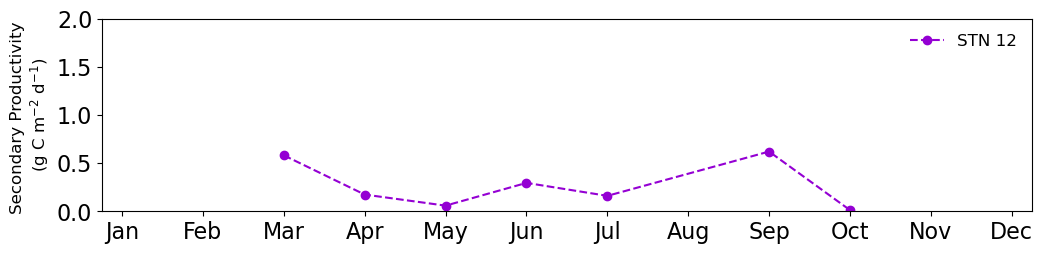

In [54]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))

#'teal','firebrick','darkviolet','fuchsia',
#        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue','lightblue','green','darkorange'

ax.plot(monthlymeanSTN12.index,((monthlymeanSTN12['BPR (g C m-2)'])),\
            color='darkviolet',linestyle='--',marker='o',label='STN 12')

ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named
ax.set_ylim(0,2)
ax.set_xlim(0.75,12.25)
ax.set_ylabel('Secondary Productivity \n(g C m$^{-2}$ d$^{-1}$)',fontsize=12)
ax.legend(fontsize=12,frameon=False,bbox_to_anchor=(1., 1.0))

#ax.plot(monthlymeanSTN42.index,((monthlymeanSTN42['Total C production * (g C /m2/day)'])),\
#            color='teal',linestyle='-',marker='o',label='STN 42')



#fig.set_title('')
#fig.savefig('.png',bbox_inches='tight')

In [55]:
monthlymeanSTN12['BPR (g C m-2)']

Month
3     0.581042
4     0.173537
5     0.058524
6     0.294918
7     0.160217
9     0.620525
10    0.012638
Name: BPR (g C m-2), dtype: float64

In [56]:
SPSTN12=np.array([0.581042,
0.173537,
0.294918,
0.620525,
0.012638])

In [57]:
PPSTN12=np.array([ 7.600000,
1.250000,
2.700000,
1.116667,
0.660000])

In [58]:
TTESTN12=(SPSTN12/PPSTN12)*100

In [59]:
TTESTN12

array([ 7.64528947, 13.88296   , 10.92288889, 55.5693864 ,  1.91484848])

In [73]:
TTESTN12.min()

1.9148484848484848

In [74]:
TTESTN12.max()

55.56938639719809

In [60]:
TTESTN12.mean()

17.987074648923937

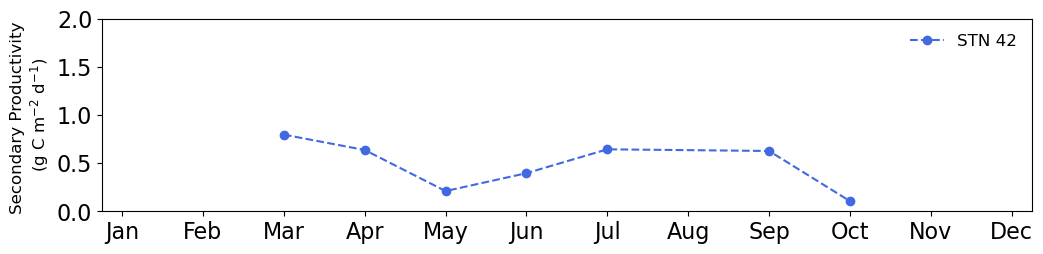

In [61]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))

#'teal','firebrick','darkviolet','fuchsia',
#        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue','lightblue','green','darkorange'

ax.plot(monthlymeanSTN42.index,((monthlymeanSTN42['BPR (g C m-2)'])),\
            color='royalblue',linestyle='--',marker='o',label='STN 42')

ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #where you replace axs[0] with whatever your axis is named
ax.set_ylim(0,2)
ax.set_xlim(0.75,12.25)
ax.set_ylabel('Secondary Productivity \n(g C m$^{-2}$ d$^{-1}$)',fontsize=12)
ax.legend(fontsize=12,frameon=False,bbox_to_anchor=(1., 1.0))

#ax.plot(monthlymeanSTN42.index,((monthlymeanSTN42['Total C production * (g C /m2/day)'])),\
#            color='teal',linestyle='-',marker='o',label='STN 42')



#fig.set_title('')
#fig.savefig('.png',bbox_inches='tight')

In [62]:
monthlymeanSTN42['BPR (g C m-2)']

Month
3     0.796334
4     0.636726
5     0.209962
6     0.395847
7     0.643826
9     0.626561
10    0.105523
Name: BPR (g C m-2), dtype: float64

In [63]:
SPStn42=np.array([
         0.796334,
0.636726,
0.209962,
0.395847,
0.643826,
0.626561,
0.105523])

In [64]:
PPStn42=np.array([
1.450000,
12.800000,
6.400000,
2.633333,
1.400000,
2.605000,
0.492500])

In [65]:
SPStn42

array([0.796334, 0.636726, 0.209962, 0.395847, 0.643826, 0.626561,
       0.105523])

In [66]:
TTEStn42=(SPStn42/PPStn42)*100

In [67]:
TTEStn42

array([54.91958621,  4.97442187,  3.28065625, 15.03216646, 45.98757143,
       24.05224568, 21.42598985])

In [77]:
TTEStn42.min()

3.28065625

In [78]:
TTEStn42.max()

54.919586206896554

In [68]:
TTEStn42.mean()

24.238948249904798